In [133]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [204]:
train_data = pd.read_csv('../Datasets/Digit Recognition/Dataset/train.csv')
test_data = pd.read_csv('../Datasets/Digit Recognition/Dataset/test.csv')

In [135]:
# inspect the dataset shape
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [136]:
train_labels = train_data['label']
train_data = train_data.drop('label', axis = 1)

In [137]:
encoder = OneHotEncoder()
y = encoder.fit_transform(train_labels.values.reshape(-1, 1)).toarray()

In [138]:
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
train_data = train_data.to_numpy().reshape(train_data.shape[0], 28, 28)
train_data.shape

(42000, 28, 28)

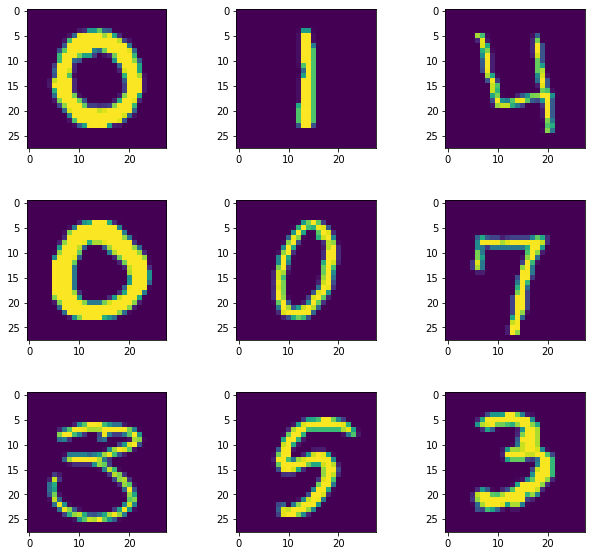

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 0.5)
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(train_data[i])

In [196]:
def digit_classifier():
    
    # defining input layer
    input_data = tf.keras.Input(shape = (28, 28, 1))
    
    X = tfl.Resizing(32, 32)(input_data)
    X = tfl.RandomZoom(0.2)(X)
    
   # output = leNet(input_data)
    X = tfl.Conv2D(filters = 6, kernel_size = (5, 5), strides = (1, 1))(X)
    X = tfl.BatchNormalization()(X)
    X = tfl.Activation('relu')(X)
    
    X = tfl.AveragePooling2D(strides = 2)(X)
    
    X = tfl.Conv2D(16, 5, 1)(X)
    X = tfl.BatchNormalization()(X)
    X = tfl.Activation('relu')(X)
    
    X = tfl.AveragePooling2D(strides = 2)(X)
    
    X = tfl.Flatten()(X)
    X = tfl.Dense(120, activation = 'relu')(X)
    
    X = tfl.Dense(84, activation = 'sigmoid')(X)
    
    output = tfl.Dense(10, activation = 'softmax')(X)
    
    model = tf.keras.Model(inputs = input_data, outputs = output)
    
    return model

In [197]:
clf = digit_classifier()
clf.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 resizing_20 (Resizing)      (None, 32, 32, 1)         0         
                                                                 
 random_zoom_7 (RandomZoom)  (None, 32, 32, 1)         0         
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 batch_normalization_36 (Bat  (None, 28, 28, 6)        24        
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 28, 28, 6)         0         
                                                          

In [198]:
clf.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
           )

In [199]:
clf.fit(train_data, y, epochs = 20, validation_split = 0.05)

Epoch 1/20
1247/1247 [==============================] - 16s 12ms/step - loss: 0.0647 - accuracy: 0.9258 - val_loss: 0.0168 - val_accuracy: 0.9781
Epoch 2/20
1247/1247 [==============================] - 14s 12ms/step - loss: 0.0136 - accuracy: 0.9809 - val_loss: 0.0114 - val_accuracy: 0.9843
Epoch 3/20
1247/1247 [==============================] - 14s 12ms/step - loss: 0.0100 - accuracy: 0.9849 - val_loss: 0.0099 - val_accuracy: 0.9833
Epoch 4/20
1247/1247 [==============================] - 14s 12ms/step - loss: 0.0083 - accuracy: 0.9870 - val_loss: 0.0080 - val_accuracy: 0.9871
Epoch 5/20
1247/1247 [==============================] - 14s 11ms/step - loss: 0.0067 - accuracy: 0.9893 - val_loss: 0.0062 - val_accuracy: 0.9886
Epoch 6/20
1247/1247 [==============================] - 14s 12ms/step - loss: 0.0057 - accuracy: 0.9911 - val_loss: 0.0067 - val_accuracy: 0.9910
Epoch 7/20
1247/1247 [==============================] - 14s 12ms/step - loss: 0.0053 - accuracy: 0.9918 - val_loss: 0.0092 -

In [164]:
y_train_pred = clf.predict(train_data)
y_train = y_train_pred.argmax(axis = 1)

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [180]:
indices = np.where((y_train != train_labels))[0]
wrong_index = np.random.randint(len(indices), size = 100)
misclassified_records = indices[wrong_index]

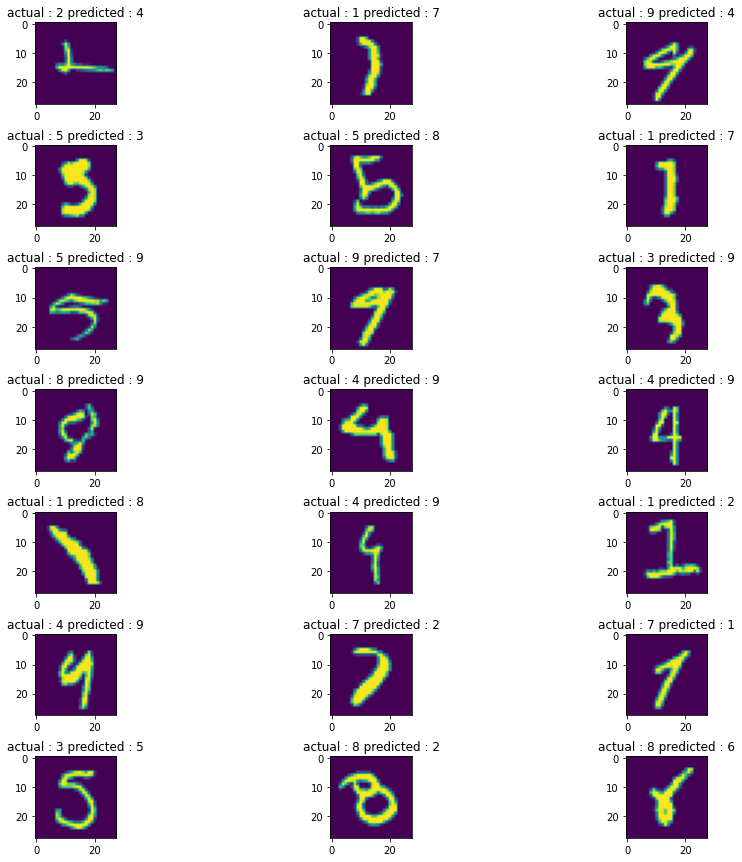

In [193]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = 0.5)
for i in range(1, 22):
    index = misclassified_records[i]
    plt.subplot(7, 3, i)
    plt.title('actual : ' + str(train_labels[index]) + ' predicted : ' + str(y_train[index]))
    plt.imshow(train_data[index])

In [200]:
history = clf.history.history
loss_metrics = pd.DataFrame({
    'loss' : history['loss'],
    'val_loss' : history['val_loss']
})
accuracy_metrics = pd.DataFrame({
    'accuracy' : history['accuracy'],
    'val_accuracy' : history['val_accuracy']
})

<AxesSubplot:xlabel='Epochs', ylabel='Loss'>

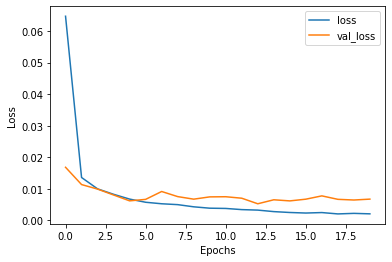

In [201]:
loss_metrics.plot(xlabel = 'Epochs', ylabel = 'Loss')

<AxesSubplot:xlabel='Epochs', ylabel='Accuracy'>

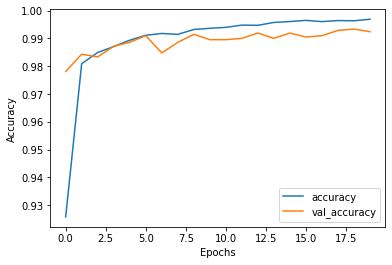

In [202]:
accuracy_metrics.plot(xlabel = 'Epochs', ylabel = 'Accuracy')

In [206]:
test_data = test_data.to_numpy().reshape(test_data.shape[0], 28, 28)
    
y_pred = clf.predict(test_data)

875/875 [==============================] - 3s 3ms/step


In [207]:
y_pred

array([[1.0225382e-10, 1.2791740e-10, 1.0000000e+00, ..., 1.1288935e-09,
        7.3446138e-11, 2.4614530e-10],
       [1.0000000e+00, 7.1071662e-11, 1.4537496e-10, ..., 5.8631239e-11,
        4.2139520e-10, 2.0762252e-10],
       [5.7882331e-11, 4.2545321e-11, 8.4483154e-10, ..., 5.5000382e-09,
        3.0704774e-09, 1.0000000e+00],
       ...,
       [3.4919550e-11, 3.6246305e-11, 4.0622127e-11, ..., 4.0839984e-10,
        8.1993246e-11, 2.8424230e-11],
       [7.5727570e-11, 2.8292250e-11, 1.8256757e-10, ..., 4.5538439e-08,
        4.4977821e-10, 9.9999988e-01],
       [6.3983312e-11, 2.3143683e-10, 1.0000000e+00, ..., 4.7831006e-10,
        2.3485464e-10, 6.5280287e-10]], dtype=float32)

In [208]:
submission = pd.DataFrame({
    'ImageId' : np.arange(1, y_pred.shape[0]+1),
    'Label' : y_pred.argmax(axis = 1)
})

In [209]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [210]:
submission.to_csv('submission.csv', index = False)